**SHETH L.U.J & SIR M.V COLLEGE**

DATA SCIENCE

T094 : Shubhangi Man

AIM : Principal Component Analysis (PCA)-

 Perform PCA on a dataset to reduce dimensionality.

Evaluate the explained variance and select the appropriate number of principal
components.

Visualize the data in the reduced-dimensional space.

Load Dataset + Show Info

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load Dermatology dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data"

column_names = [
    "erythema", "scaling", "definite_borders", "itching", "koebner_phenomenon",
    "polygonal_papules", "follicular_papules", "oral_mucosal", "knee_lesions",
    "scalp_involvement", "family_history", "melanin", "eosinophils", "PNL",
    "fibrosis_papules", "histiocytes", "collagen_fibers", "papillary_dermis",
    "reticular_dermis", "edema", "acanthosis", "hyperkeratosis",
    "parakeratosis", "clubbing_retes", "elongation_retes",
    "thinning_suprapapillary", "spongiosis", "exocytosis", "microabcess",
    "munro_microabcess", "focal_hypergranulosis", "epidermal_atrophy",
    "eosinophils_upper", "class"
]

df = pd.read_csv(url, header=None, names=column_names)

# Replace missing values "?" with NaN
df = df.replace("?", None).dropna()

print("🔹 Dataset Shape:", df.shape)
print("\n🔹 First 5 rows:\n", df.head())


🔹 Dataset Shape: (358, 34)

🔹 First 5 rows:
    erythema  scaling  definite_borders  itching  koebner_phenomenon  \
2         2        0                 3        0                   0   
3         3        3                 2        1                   0   
2         1        2                 3        1                   3   
2         2        2                 0        0                   0   
2         3        2                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal  knee_lesions  \
2                  0                   0             1             0   
3                  0                   0             1             1   
2                  0                   3             0             0   
2                  0                   0             3             2   
2                  0                   2             0             0   

   scalp_involvement  ...  elongation_retes  thinning_suprapapillary  \
2                  0  .

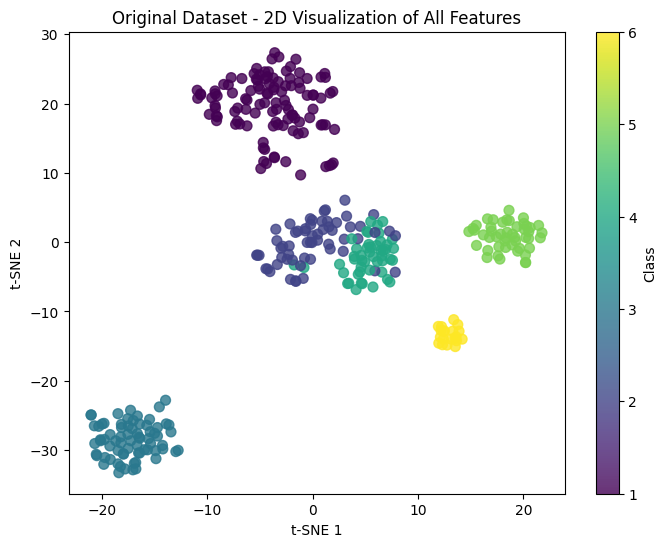

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load Dermatology dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data"
column_names = [
    "erythema", "scaling", "definite_borders", "itching", "koebner_phenomenon",
    "polygonal_papules", "follicular_papules", "oral_mucosal", "knee_lesions",
    "scalp_involvement", "family_history", "melanin", "eosinophils", "PNL",
    "fibrosis_papules", "histiocytes", "collagen_fibers", "papillary_dermis",
    "reticular_dermis", "edema", "acanthosis", "hyperkeratosis",
    "parakeratosis", "clubbing_retes", "elongation_retes",
    "thinning_suprapapillary", "spongiosis", "exocytosis", "microabcess",
    "munro_microabcess", "focal_hypergranulosis", "epidermal_atrophy",
    "eosinophils_upper", "class"
]
df = pd.read_csv(url, header=None, names=column_names)
df = df.replace("?", None).dropna()

# Prepare features and target
X = df.iloc[:, :-1].astype(float)
y = df["class"].astype(int)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE to reduce all 34 features to 2D
tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', init='random')
X_tsne = tsne.fit_transform(X_scaled)

# 2D Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title("Original Dataset - 2D Visualization of All Features")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Class")
plt.show()


Prepare Data

In [ ]:
X = df.iloc[:, :-1].astype(float)  # 34 features
y = df["class"].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


PCA (Retain 99% Variance)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scaled)

print("Original features:", X.shape[1])
print("Reduced features:", X_pca.shape[1])


Original features: 33
Reduced features: 29


PCA Scree Plot

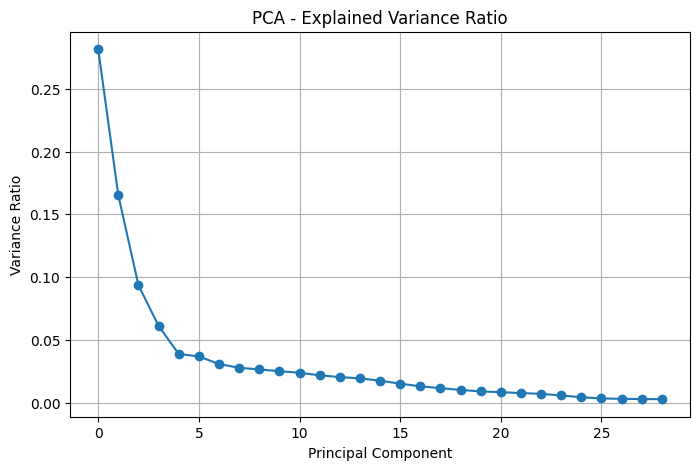

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(pca.explained_variance_ratio_, marker="o")
plt.title("PCA - Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.grid()
plt.show()


PCA 2D Visualization

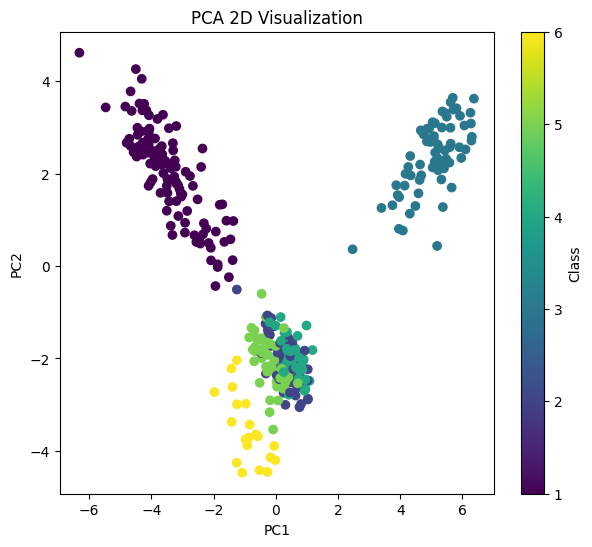

In [ ]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='viridis')
plt.title("PCA 2D Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Class")
plt.show()


Kernel PCA (RBF Kernel)

In [ ]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X_scaled)

# Print the transformed feature matrix
print("Kernel PCA Output Shape:", X_kpca.shape)
print("\nFirst 10 rows of Kernel PCA:\n")
print(X_kpca[:10])


Kernel PCA Output Shape: (358, 2)

First 10 rows of Kernel PCA:

[[-0.00396137 -0.00398373]
 [-0.00396137 -0.00398371]
 [-0.00396137 -0.00398372]
 [-0.00396137 -0.0039837 ]
 [-0.00396137 -0.00398372]
 [-0.00396137 -0.00398374]
 [-0.00396137 -0.00398373]
 [-0.00396137 -0.00398371]
 [-0.00396137 -0.00398375]
 [-0.00396137 -0.00398371]]


Kernel PCA 2D Visualization

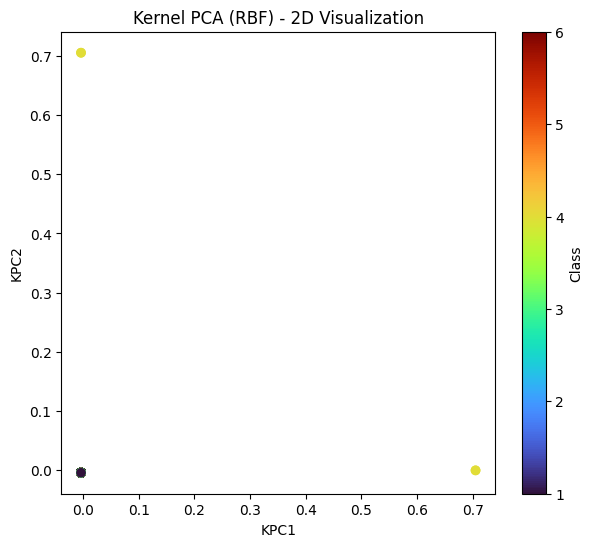

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, cmap='turbo')
plt.title("Kernel PCA (RBF) - 2D Visualization")
plt.xlabel("KPC1")
plt.ylabel("KPC2")
plt.colorbar(label="Class")
plt.show()


LDA (Linear Discriminant Analysis)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

print("Original features:", X.shape[1])
print("Reduced with LDA:", X_lda.shape[1])


Original features: 33
Reduced with LDA: 2


LDA 2D Visualization

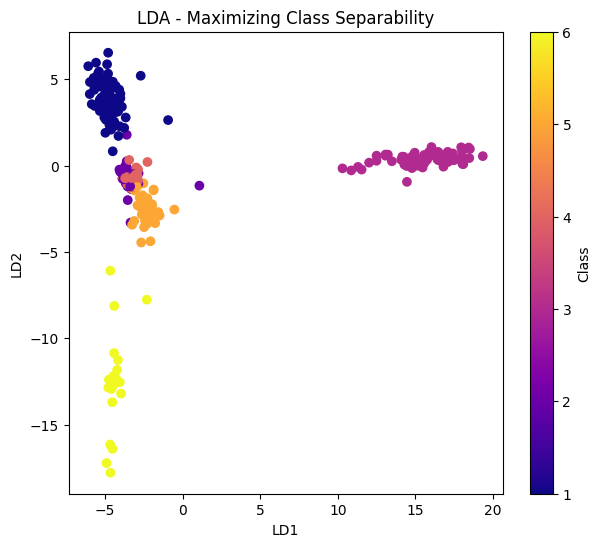

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='plasma')
plt.title("LDA - Maximizing Class Separability")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.colorbar(label="Class")
plt.show()


Best Method: LDA

LDA means Linear Discriminant Analysis

Why LDA is the best choice for the Dermatology dataset
One: It is a classification dataset with six classes

The target column represents six types of skin diseases.
LDA is created for classification tasks where the goal is to separate classes clearly.

Two: LDA increases the distance between classes

LDA finds directions that keep different disease groups far apart.
At the same time, it keeps samples from the same class closer together.
This gives clear class separation, which is important in medical datasets.

Three: LDA reduces thirty four features into a smaller number

Because the dataset has six classes, LDA can create five new meaningful features.
This reduction keeps the class information intact and does not lose important patterns.

Four: LDA gives very clean visual results

When you draw the LDA output in two dimensions, the classes form well separated groups.
Different skin diseases appear as clear clusters.
This makes the dataset easy to understand and interpret.

Five: Works better with highly related medical features

The Dermatology dataset contains many related symptoms like itching, redness, scaling, and other skin conditions.
LDA handles such related features better than other methods.

Second Best: Kernel PCA with RBF

This method is good when the data shows non linear patterns.
The Dermatology dataset contains some non linear patterns, so Kernel PCA works well.
But Kernel PCA does not use class labels, so it does not separate the six diseases as well as LDA.

Third Best: PCA

PCA reduces features and is simple and fast.
However, PCA does not use class labels.
This means the six disease groups are not separated clearly in the reduced space.
So PCA is less effective for this dataset.